# Bank-Marketing
Creating a logistic regression model using python on a bank data, to find out if the customer have subscribed to a specific plan or not.

## Problem Statement
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

## Dataset
The dataset is in the form of a csv file and the link to download is given below:
https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv

## Data Description
Bank client data

- age (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")


### Data related to the last contact of the current campaign

- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):

- y: has the client subscribed a term deposit? (binary: "yes","no")

## Objectives
You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

- Clean the data and drop useless columns.
- Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features, remove outliers and correlated variables if necessary.
- Visualize the distributions of various features and correlations between them.
- Perform feature engineering to extract the correct features for the model.
- Build a logistic regression model
- Evaluate the model used.

## Model Evaluation
When you're done with the model building and residual analysis and have made predictions on the test set, just make sure you use y_test and y_pred.

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set. Also, remember if the VIF for the selected features is not coming high always check the p-values of the variables before applying the model on test data.

# Logistic Regression Assignment

## Total Marks: 100

## Instructions:
- This assignment is designed to test your ability to build and evaluate a logistic regression model using the given dataset.
- Follow the steps provided and answer each question with proper analysis and visualizations.
- Ensure that you add comments explaining each step in your code.
- Submit your completed Jupyter Notebook file.

---








### Submission Guidelines:
- Ensure your notebook is well-structured and properly commented.
- Submit the completed Jupyter Notebook (.ipynb) file.




## Grading Criteria:
1. **Data Loading & Inspection** - 10 marks
2. **Data Cleaning** - 10 marks
3. **Descriptive Statistics** - 10 marks
4. **Univariate Analysis** - 10 marks
5. **Bivariate Analysis** - 10 marks
6. **Multivariate Analysis** - 10 marks
7. **Heatmap & Correlation Analysis** - 10 marks
8. **Building Logistic Regression Model** - 15 marks
9. **Model Evaluation & Interpretation** - 10 marks
10. **Final Conclusion** - 5 marks

---


## Questions:

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats



### 1. Load the Data (5 marks)
- Load the dataset into a Pandas DataFrame.
- Display the first five rows to understand the structure.
- Check for missing values.

In [65]:
#Load the data set from URL to Pandas data frame
url= "https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv"
df=pd.read_csv(url)

In [66]:
#Top 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [67]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [68]:
df.shape

(4521, 17)


### 2. Data Inspection (5 marks)
- Display the data types of all columns.
- Check for duplicate values and handle them if necessary.
- Identify the target variable.

In [69]:
#Display the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [70]:
#Check for duplicated values
df.duplicated().sum()

np.int64(0)

No Duplicates found

In [71]:
#Identify the Target Variable
df['y'].value_counts()

,count
y,
no,4000
yes,521


In [72]:
df['y'].value_counts(normalize=True)*100

,proportion
y,
no,88.476001
yes,11.523999



### 3. Data Cleaning (10 marks)
- Handle missing values appropriately.
- Check for outliers using box plots.
- Perform any necessary transformations.

In [73]:
#Check missing Values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


No Missing Values found


In [74]:
num_cols = df.select_dtypes(include=['int64'])
cat_cols = df.select_dtypes(include=['object'])

In [75]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       4521 non-null   int64
 1   balance   4521 non-null   int64
 2   day       4521 non-null   int64
 3   duration  4521 non-null   int64
 4   campaign  4521 non-null   int64
 5   pdays     4521 non-null   int64
 6   previous  4521 non-null   int64
dtypes: int64(7)
memory usage: 247.4 KB


In [76]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        4521 non-null   object
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   object
 4   housing    4521 non-null   object
 5   loan       4521 non-null   object
 6   contact    4521 non-null   object
 7   month      4521 non-null   object
 8   poutcome   4521 non-null   object
 9   y          4521 non-null   object
dtypes: object(10)
memory usage: 353.3+ KB


In [77]:
def hist_box_plot(df,column):
    sns.histplot(x=df[column],data=df,kde=True)
    plt.title(f"Hist plot for numerical column {column}")
    plt.show()

    sns.boxplot(x=column,data=df)
    plt.title(f"Box plot for numerical column {column}")
    plt.show()

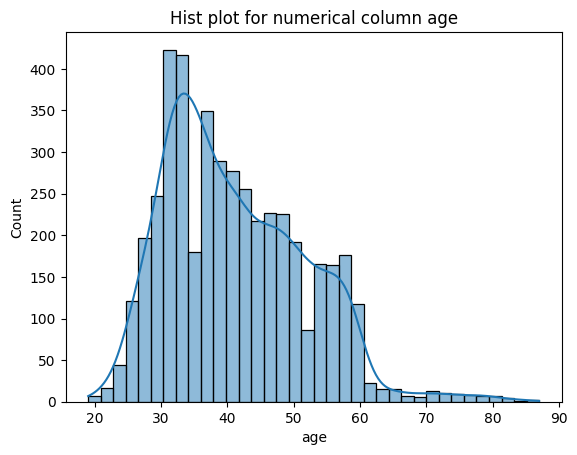

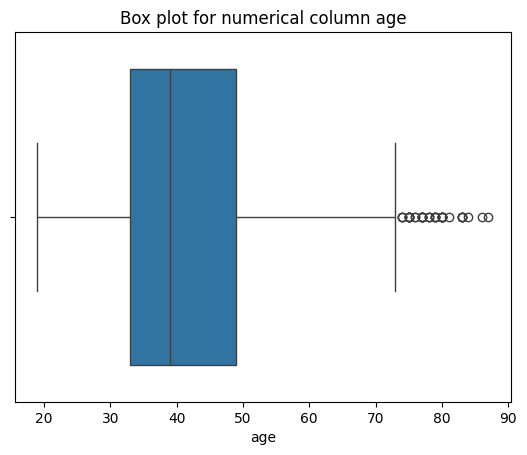

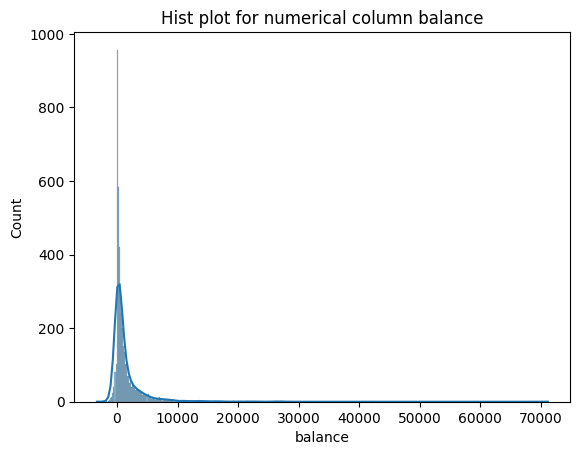

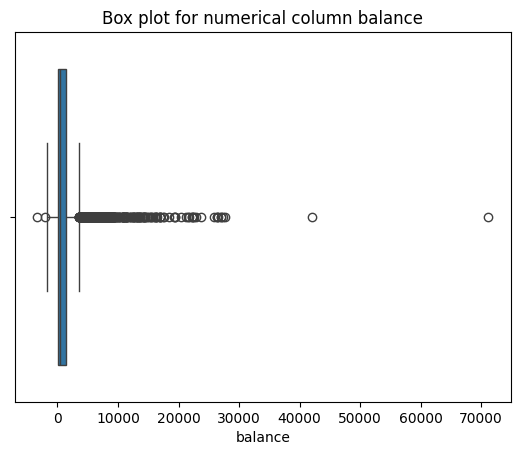

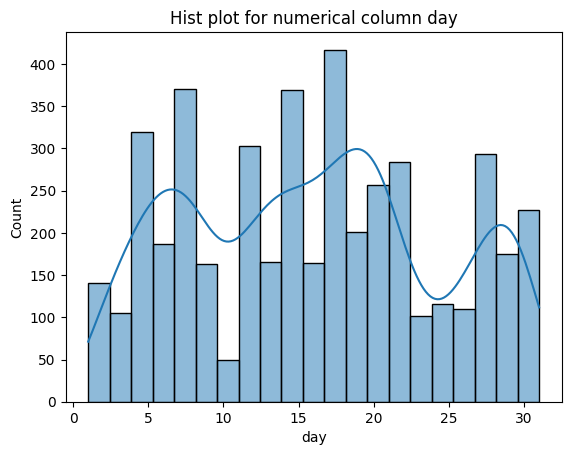

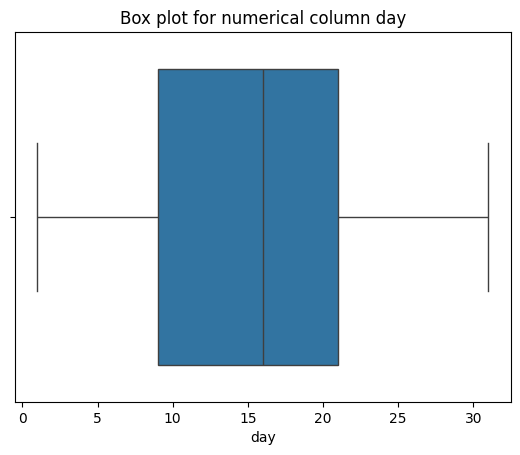

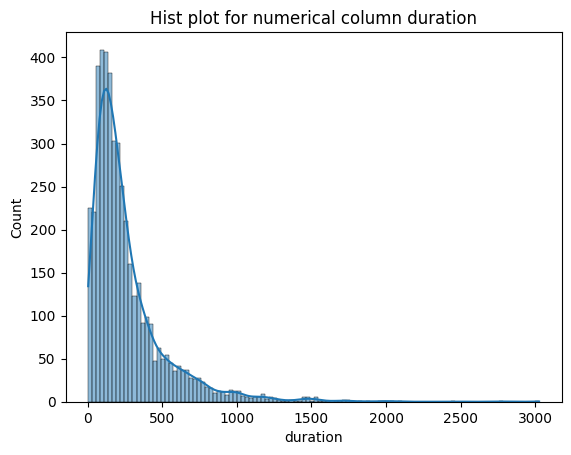

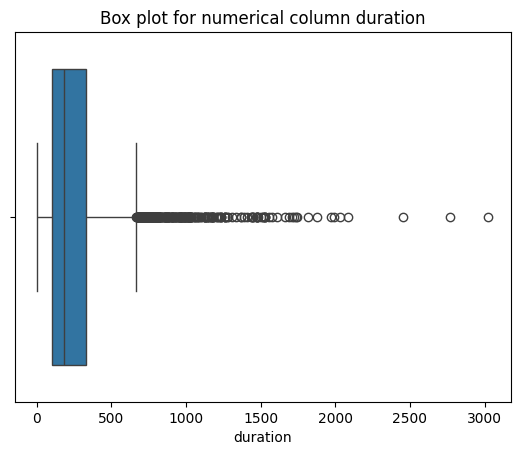

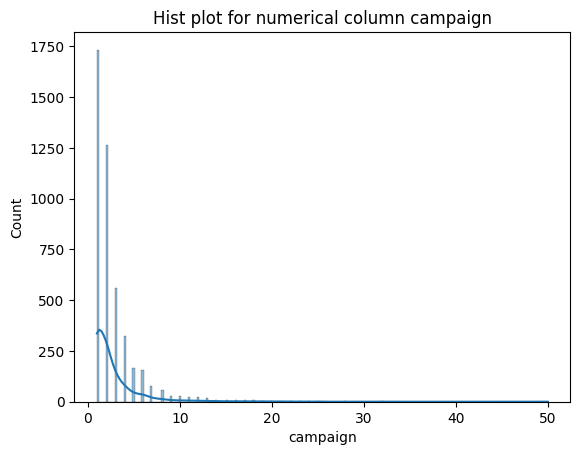

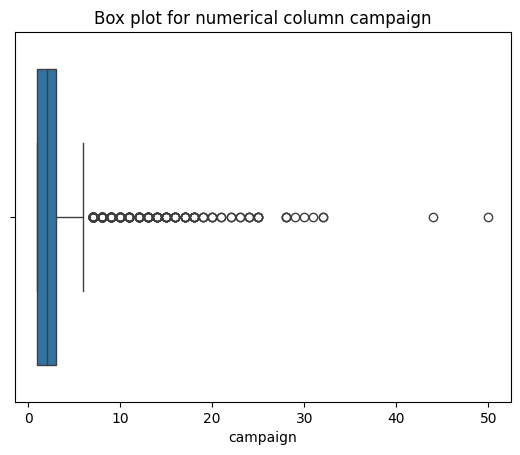

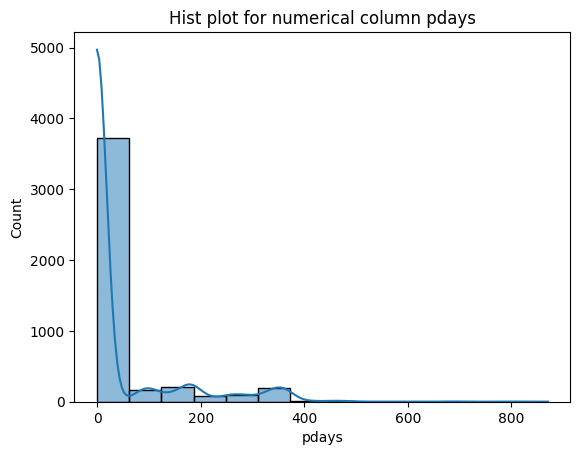

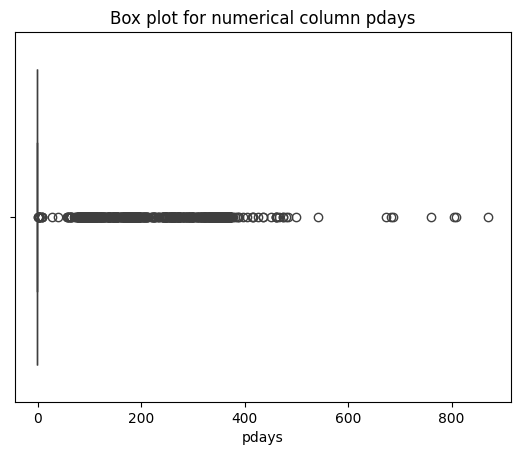

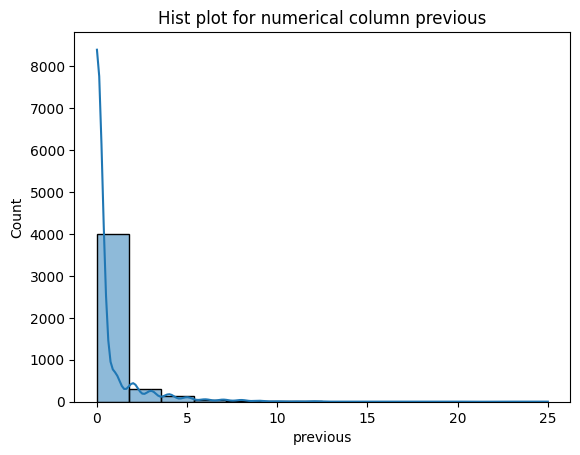

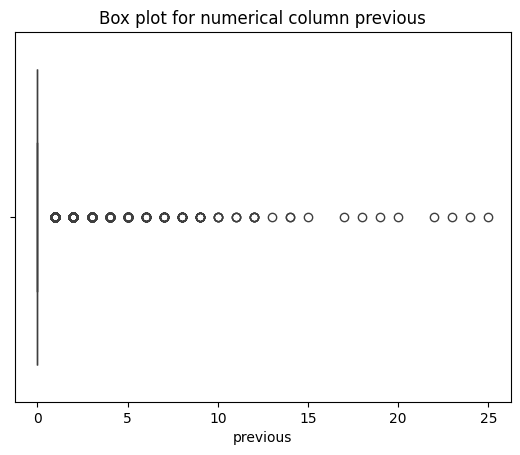

In [78]:
for col in num_cols:
  hist_box_plot(df,col)

In [79]:
#Remove outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['int64'])))
z_score_threshold = 3
outliers = (z_scores > z_score_threshold).any(axis=1)
df = df[~outliers]


### 4. Descriptive Statistics (10 marks)
- Generate summary statistics for numerical variables.
- Provide insights on the distribution of key variables.

In [80]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000
mean,40.844724,1112.654020,15.983417,242.791960,2.508543,23.390201,0.289698
std,9.995350,1766.731815,8.300115,199.063971,2.009572,69.558521,0.872491
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,61.000000,8.000000,105.000000,1.000000,-1.000000,0.000000
50%,39.000000,415.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1373.500000,21.000000,317.000000,3.000000,-1.000000,0.000000
max,72.000000,10378.000000,31.000000,1034.000000,12.000000,340.000000,5.000000


### 5. Univariate Analysis (10 marks)
- Perform and visualize univariate analysis on each column separately.
- Use histograms, boxplots, and value counts where applicable.

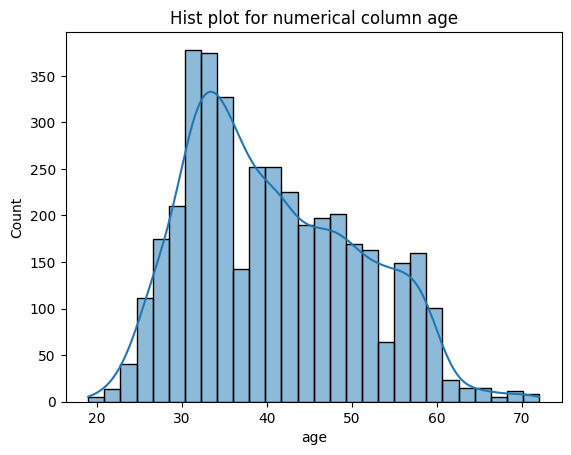

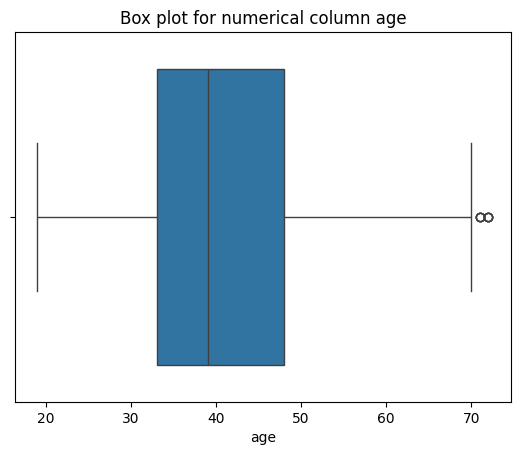

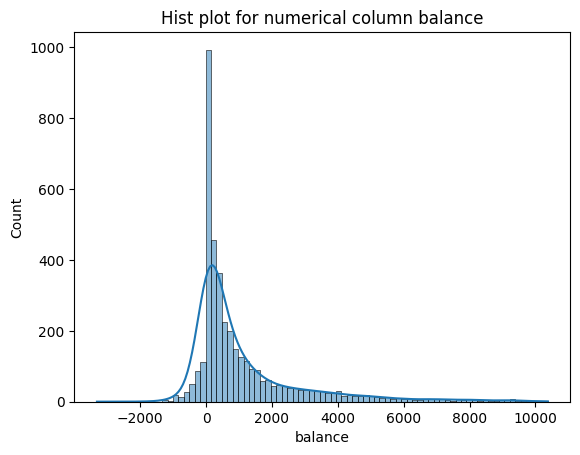

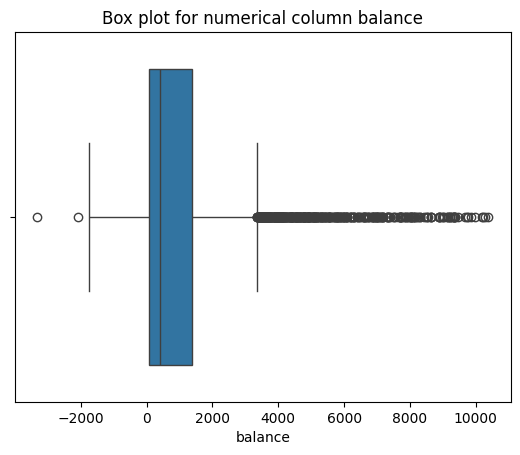

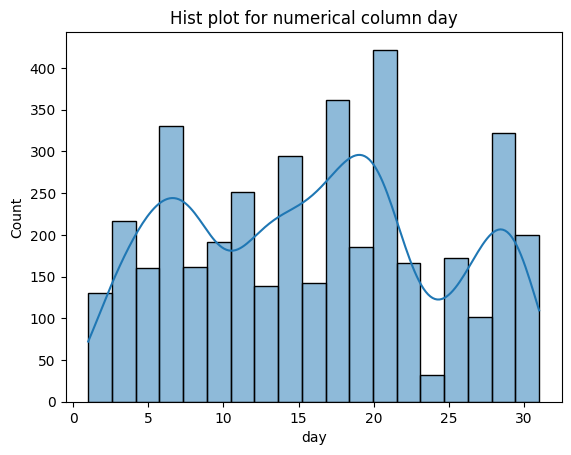

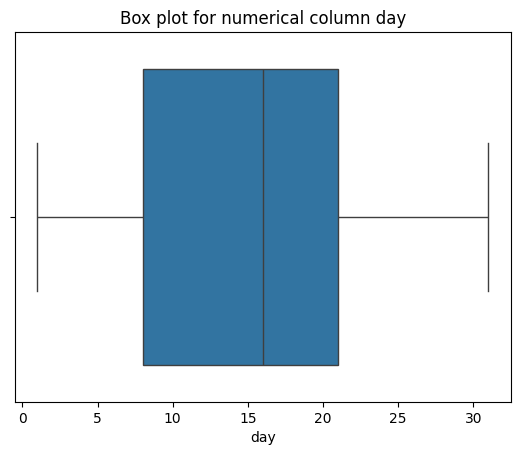

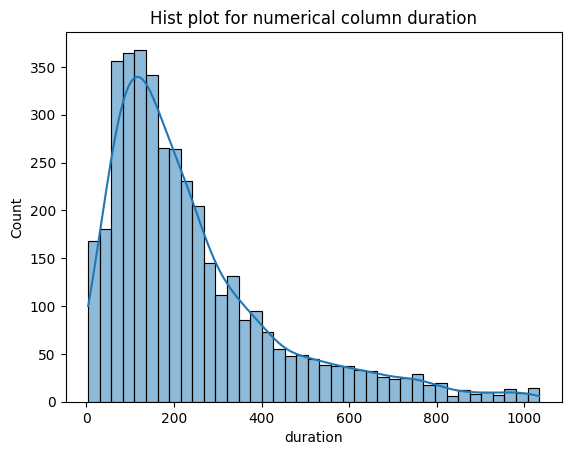

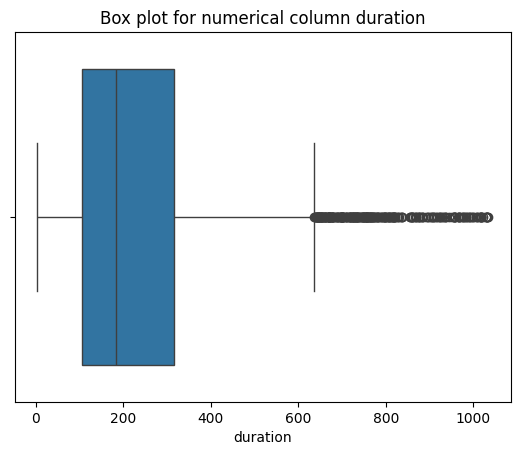

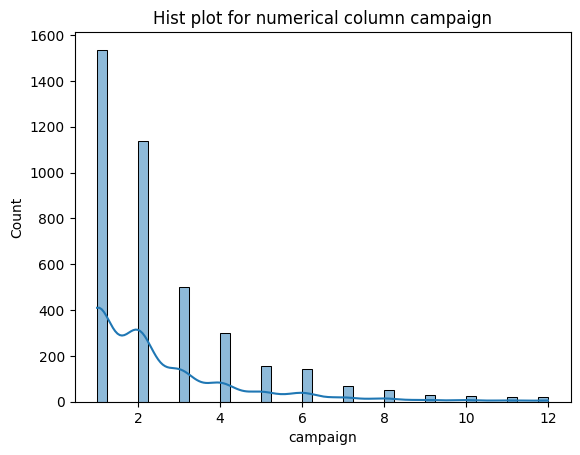

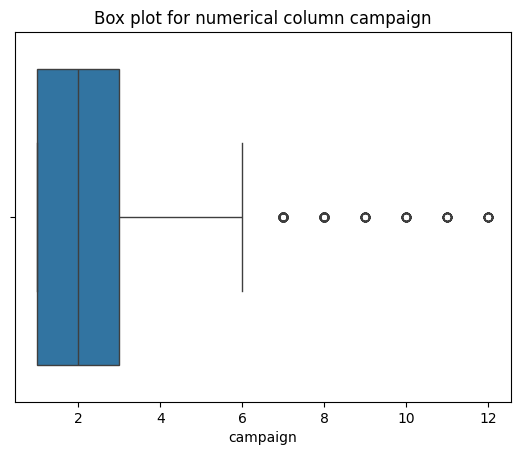

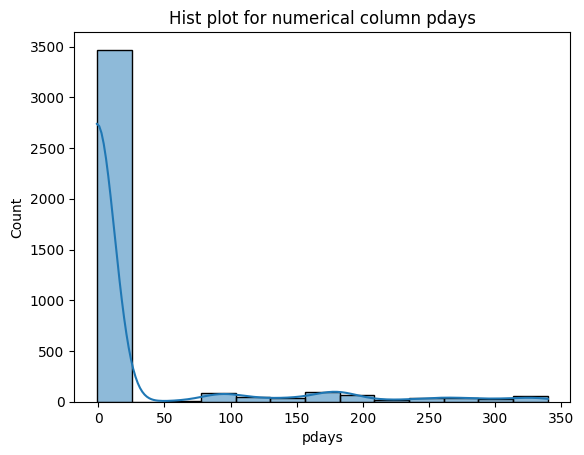

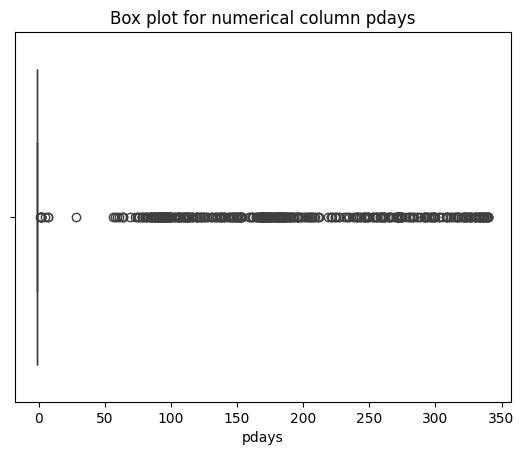

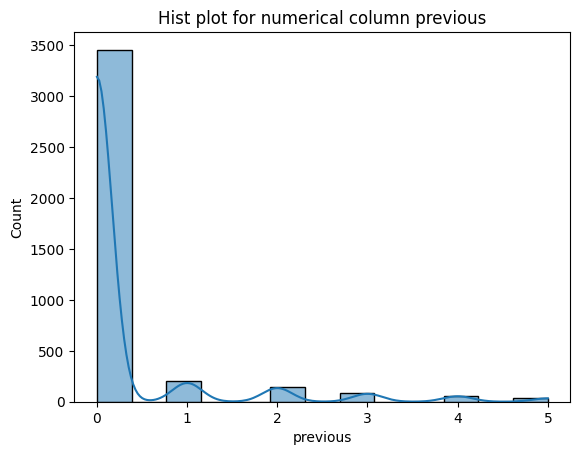

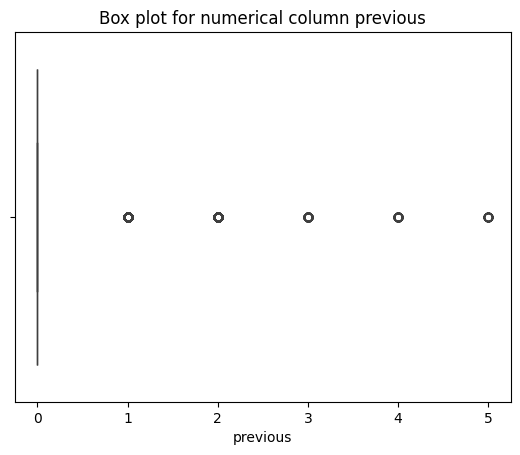

In [81]:
num_cols=df.select_dtypes(include=['int64'])
for col in num_cols:
  hist_box_plot(df,col)

In [82]:
#Categorical Columns
def count_plot(df,column):
    sns.countplot(x=df[column],data=df,)
    plt.title(f"count plot for Categorical column {column}")
    plt.show()


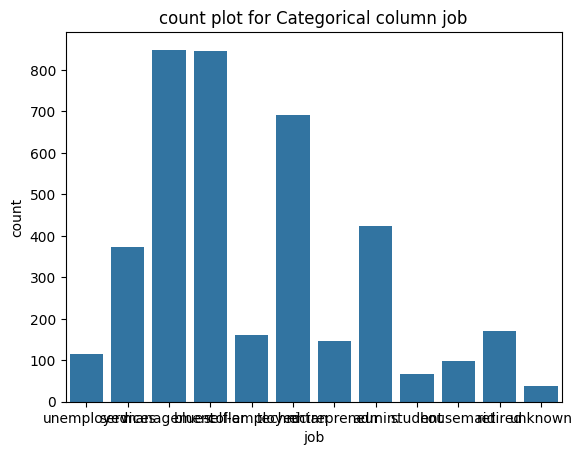

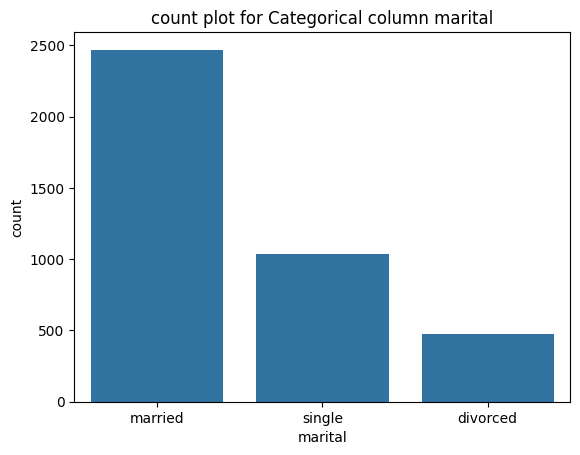

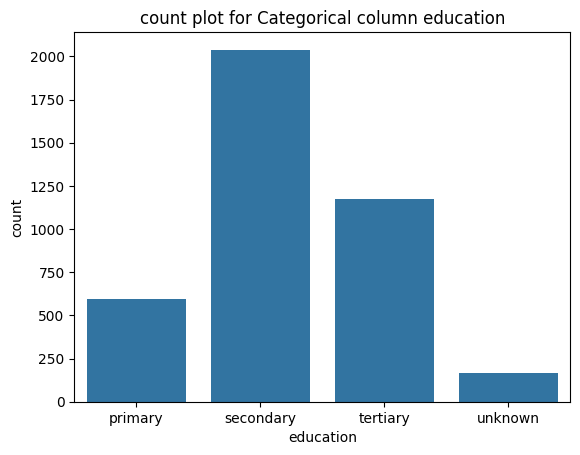

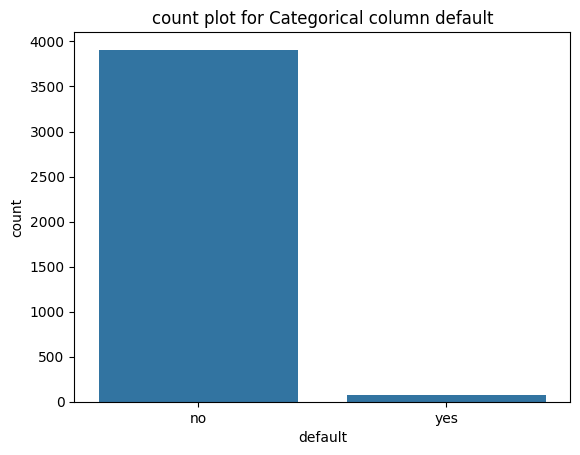

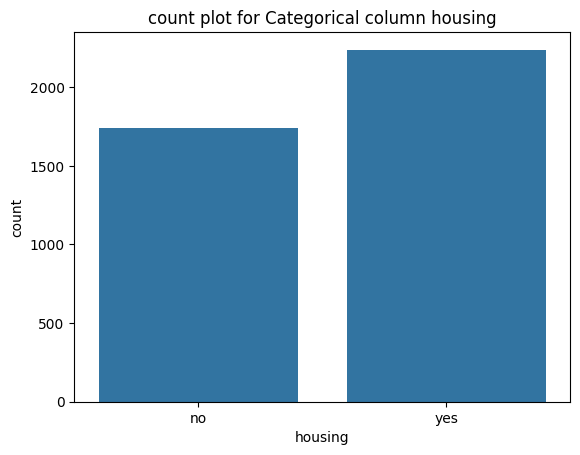

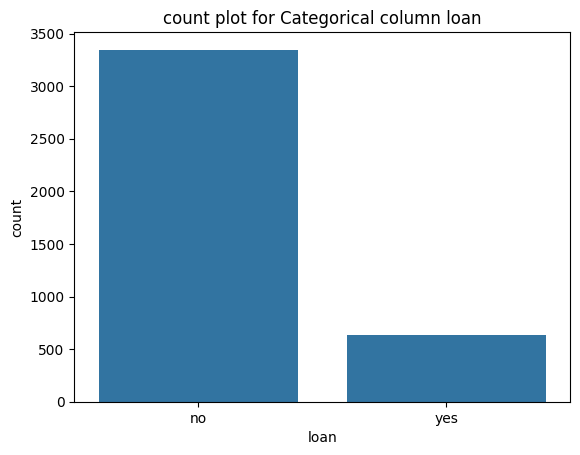

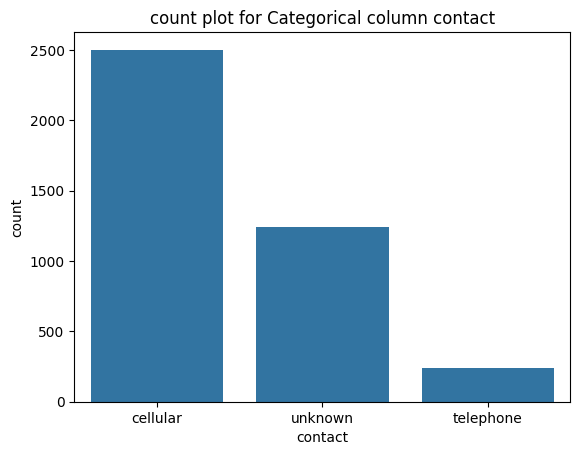

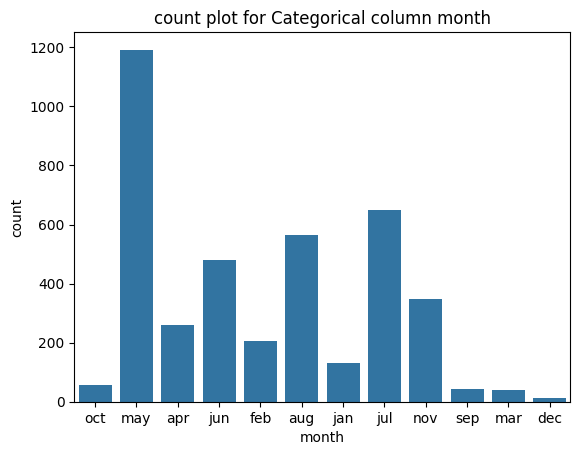

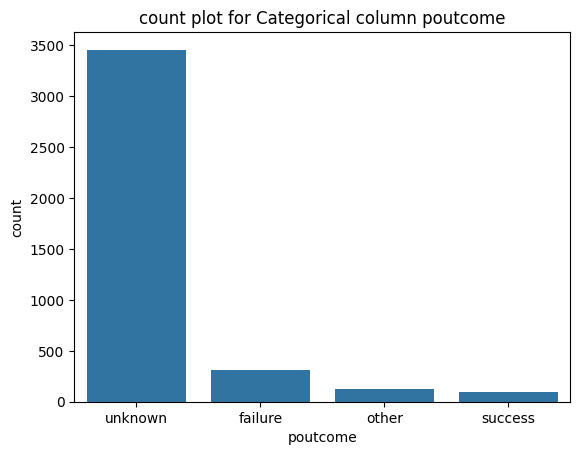

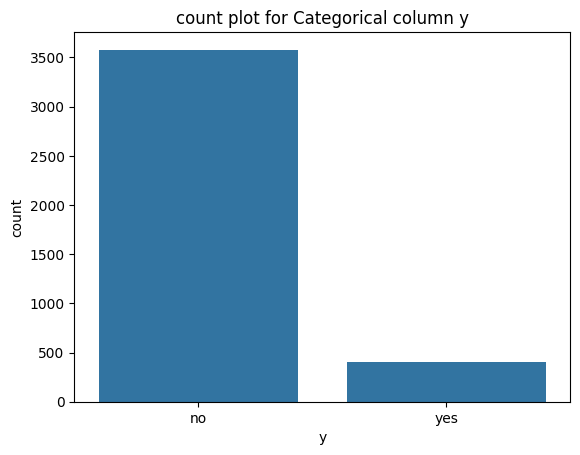

In [83]:
for col in cat_cols:
  count_plot(df,col)

### 6. Bivariate Analysis (10 marks)
- Analyze the relationship of each independent variable with the target variable.
- Use scatter plots, bar plots, and box plots for visualization.

In [84]:
def count_plot_bivaraite(df,target_column,column):
    sns.countplot(data=df,x=column,hue=target_column)
    plt.xticks(rotation=90)
    plt.title(f"Plot of {column} vs {target_column}")
    plt.show()

In [85]:
def hist_box_bivaraite_plot(df,target_column,column):
    sns.histplot(data=df,x=column, hue=target_column,kde=True)
    plt.title(f"Plot of {column} vs {target_column}")
    plt.show()

    sns.boxplot(data=df,x=column,hue=target_column)
    plt.title(f"Plot of {column} vs {target_column}")
    plt.show()

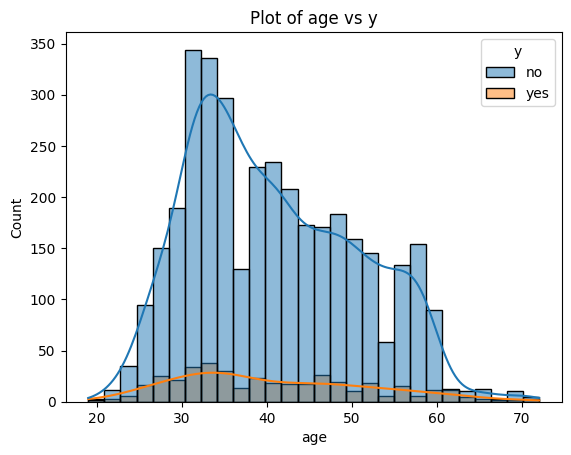

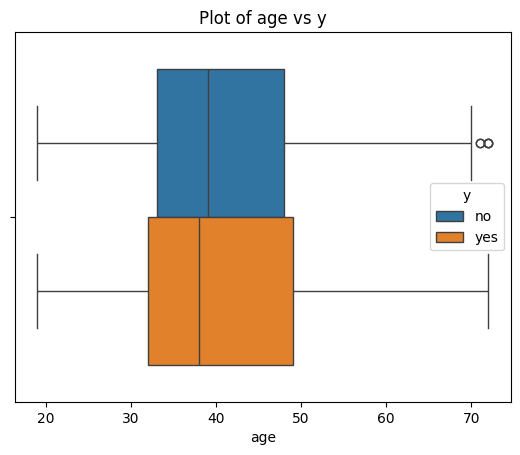

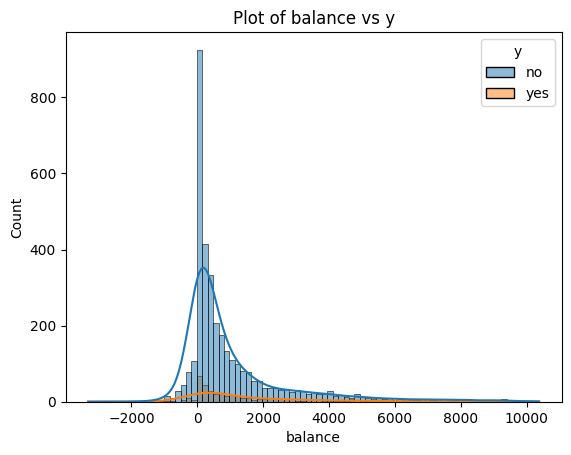

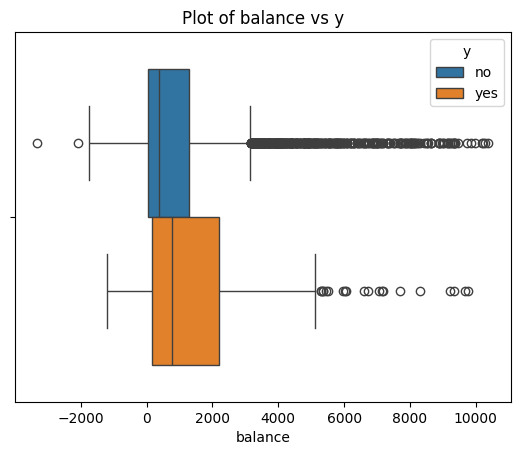

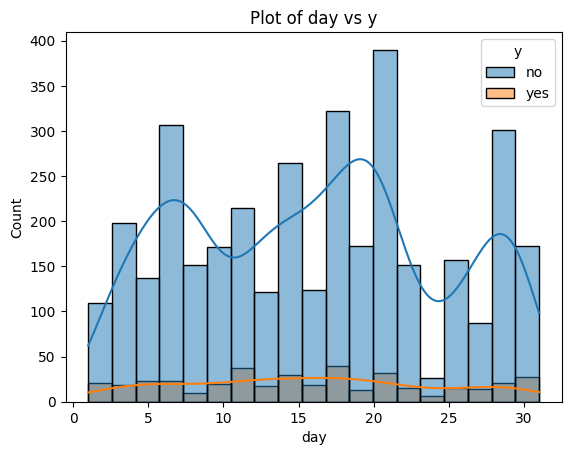

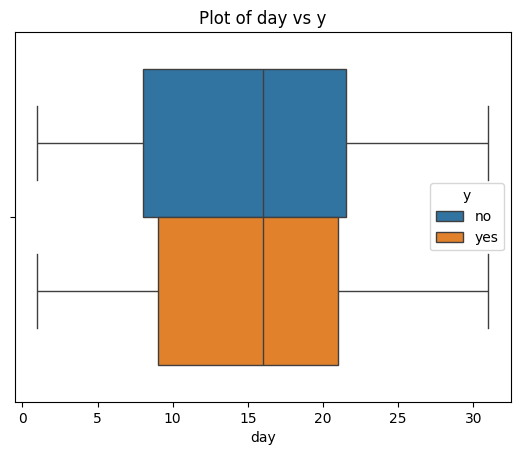

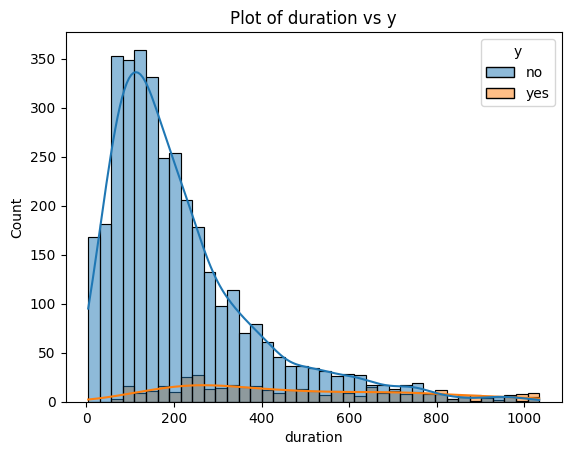

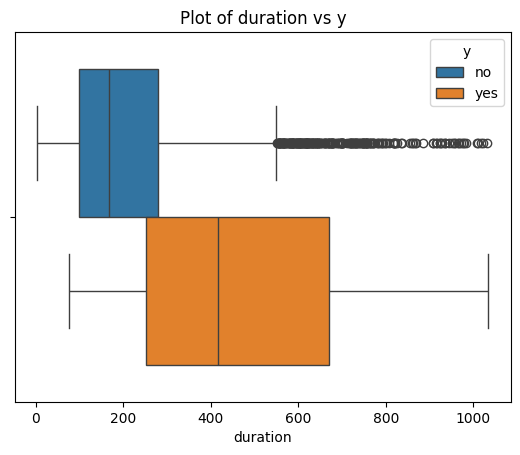

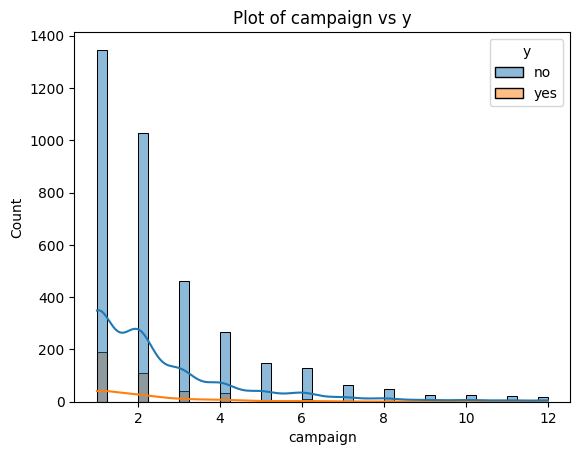

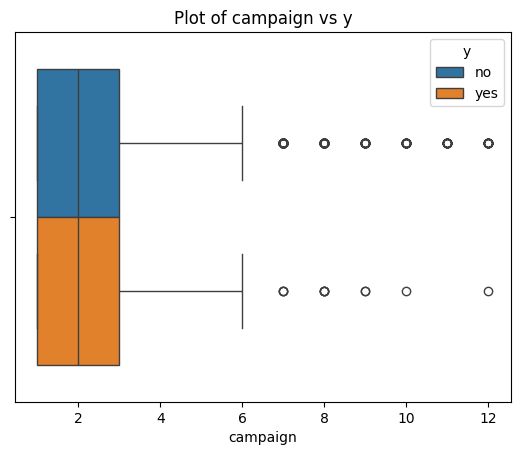

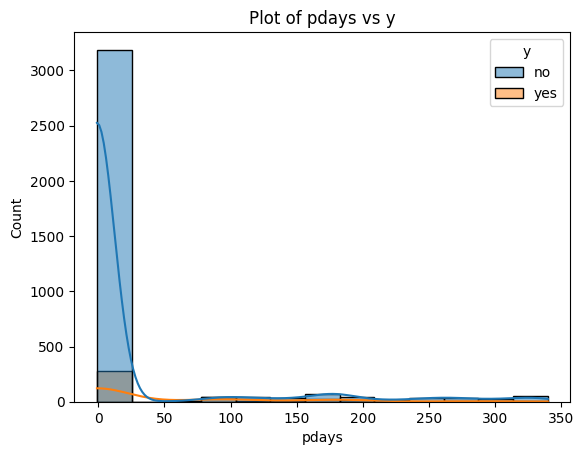

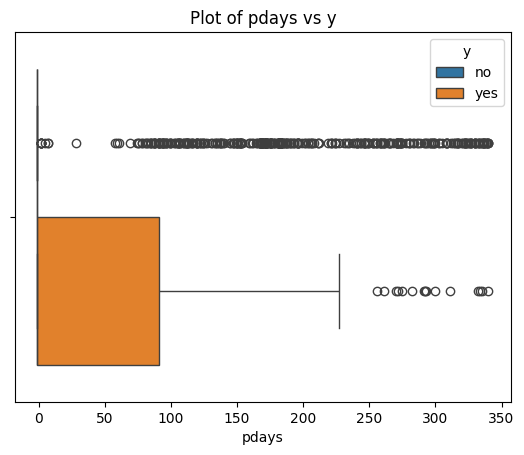

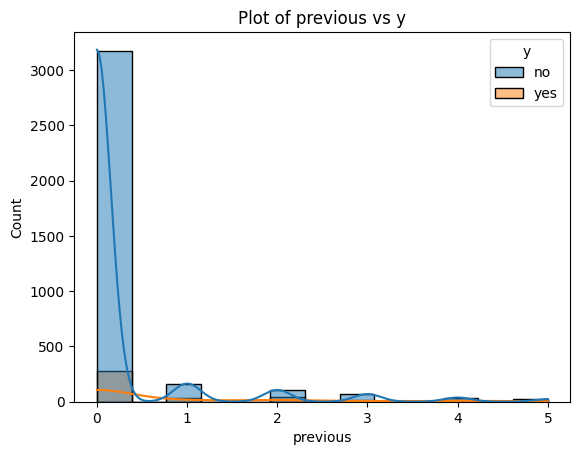

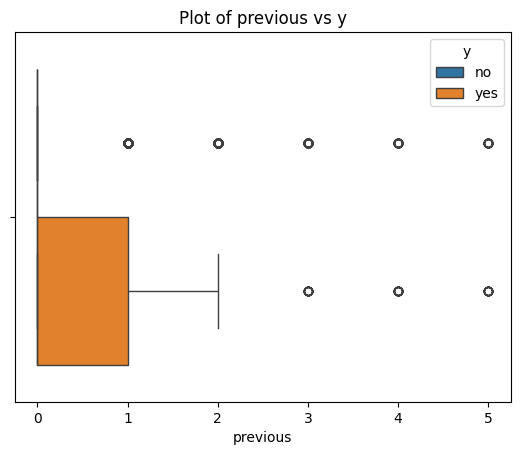

In [86]:
for col in num_cols:
  hist_box_bivaraite_plot(df,'y',col)


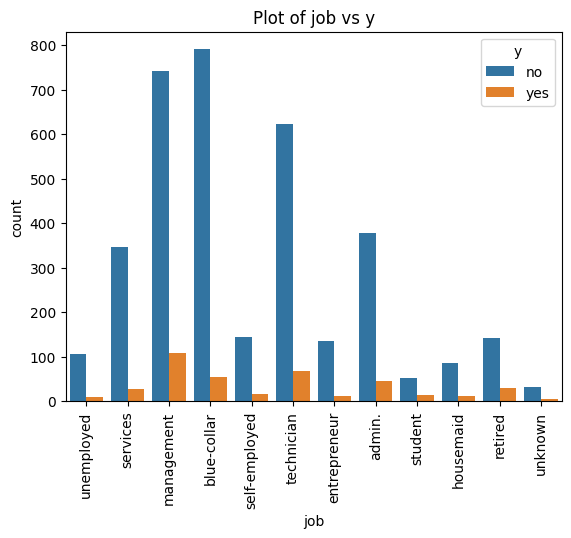

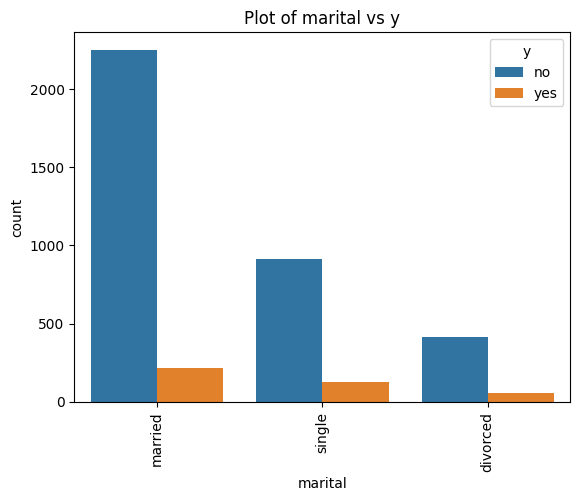

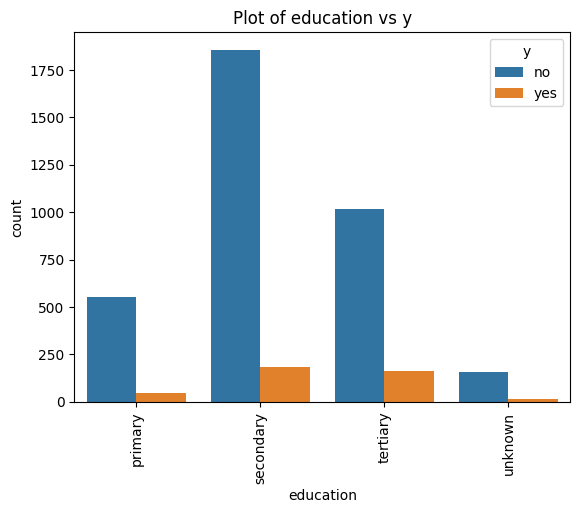

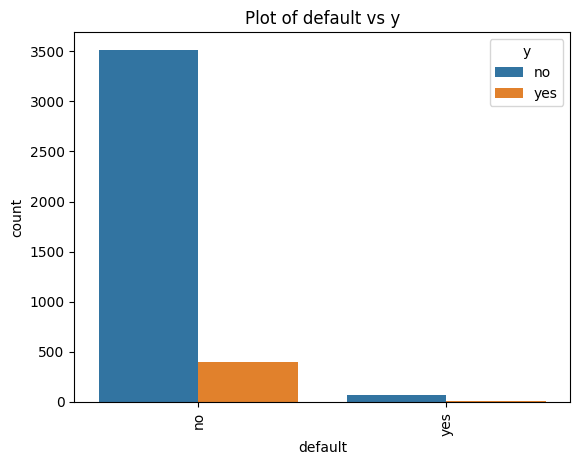

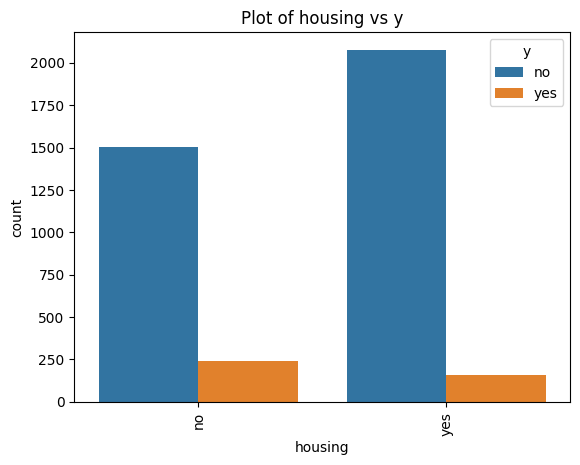

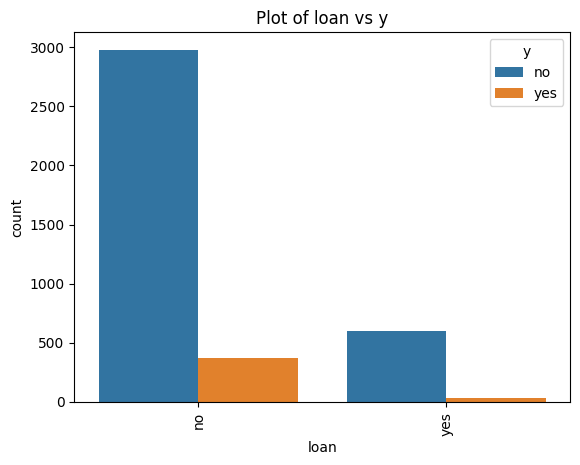

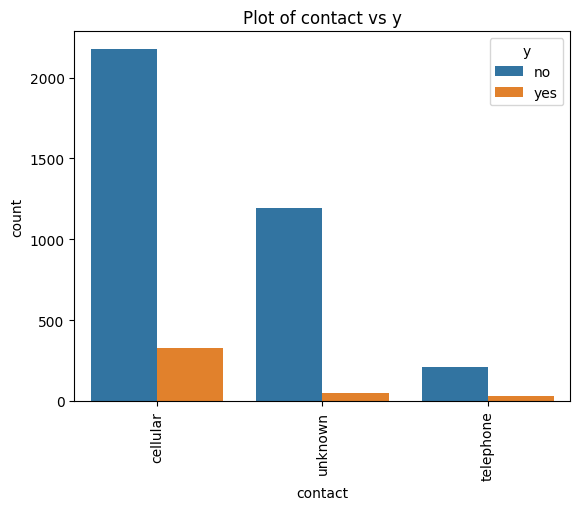

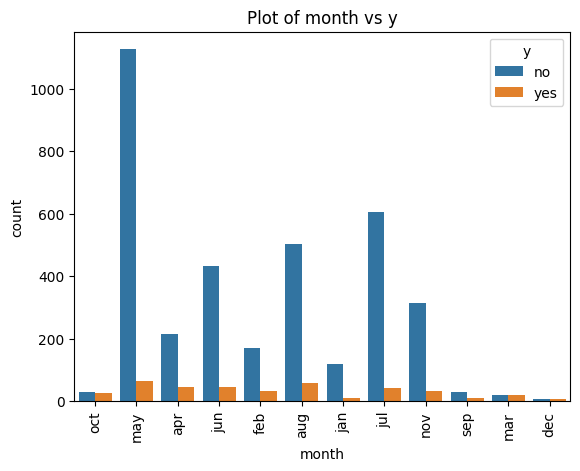

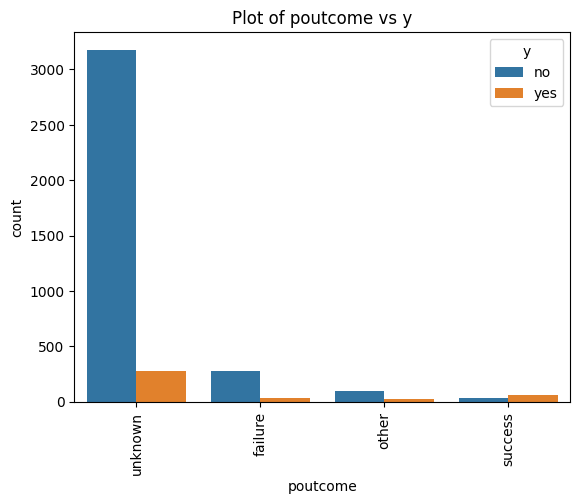

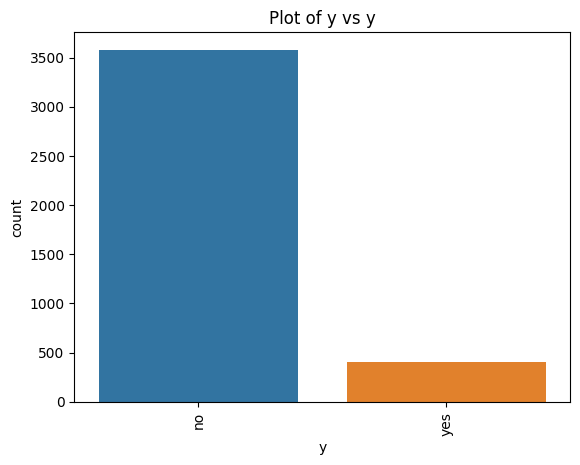

In [87]:
for col in cat_cols:
  count_plot_bivaraite(df,'y',col)

### 7. Multivariate Analysis (10 marks)
- Check for correlations between numerical features.
- Perform pairwise analysis using pair plots or correlation matrices.

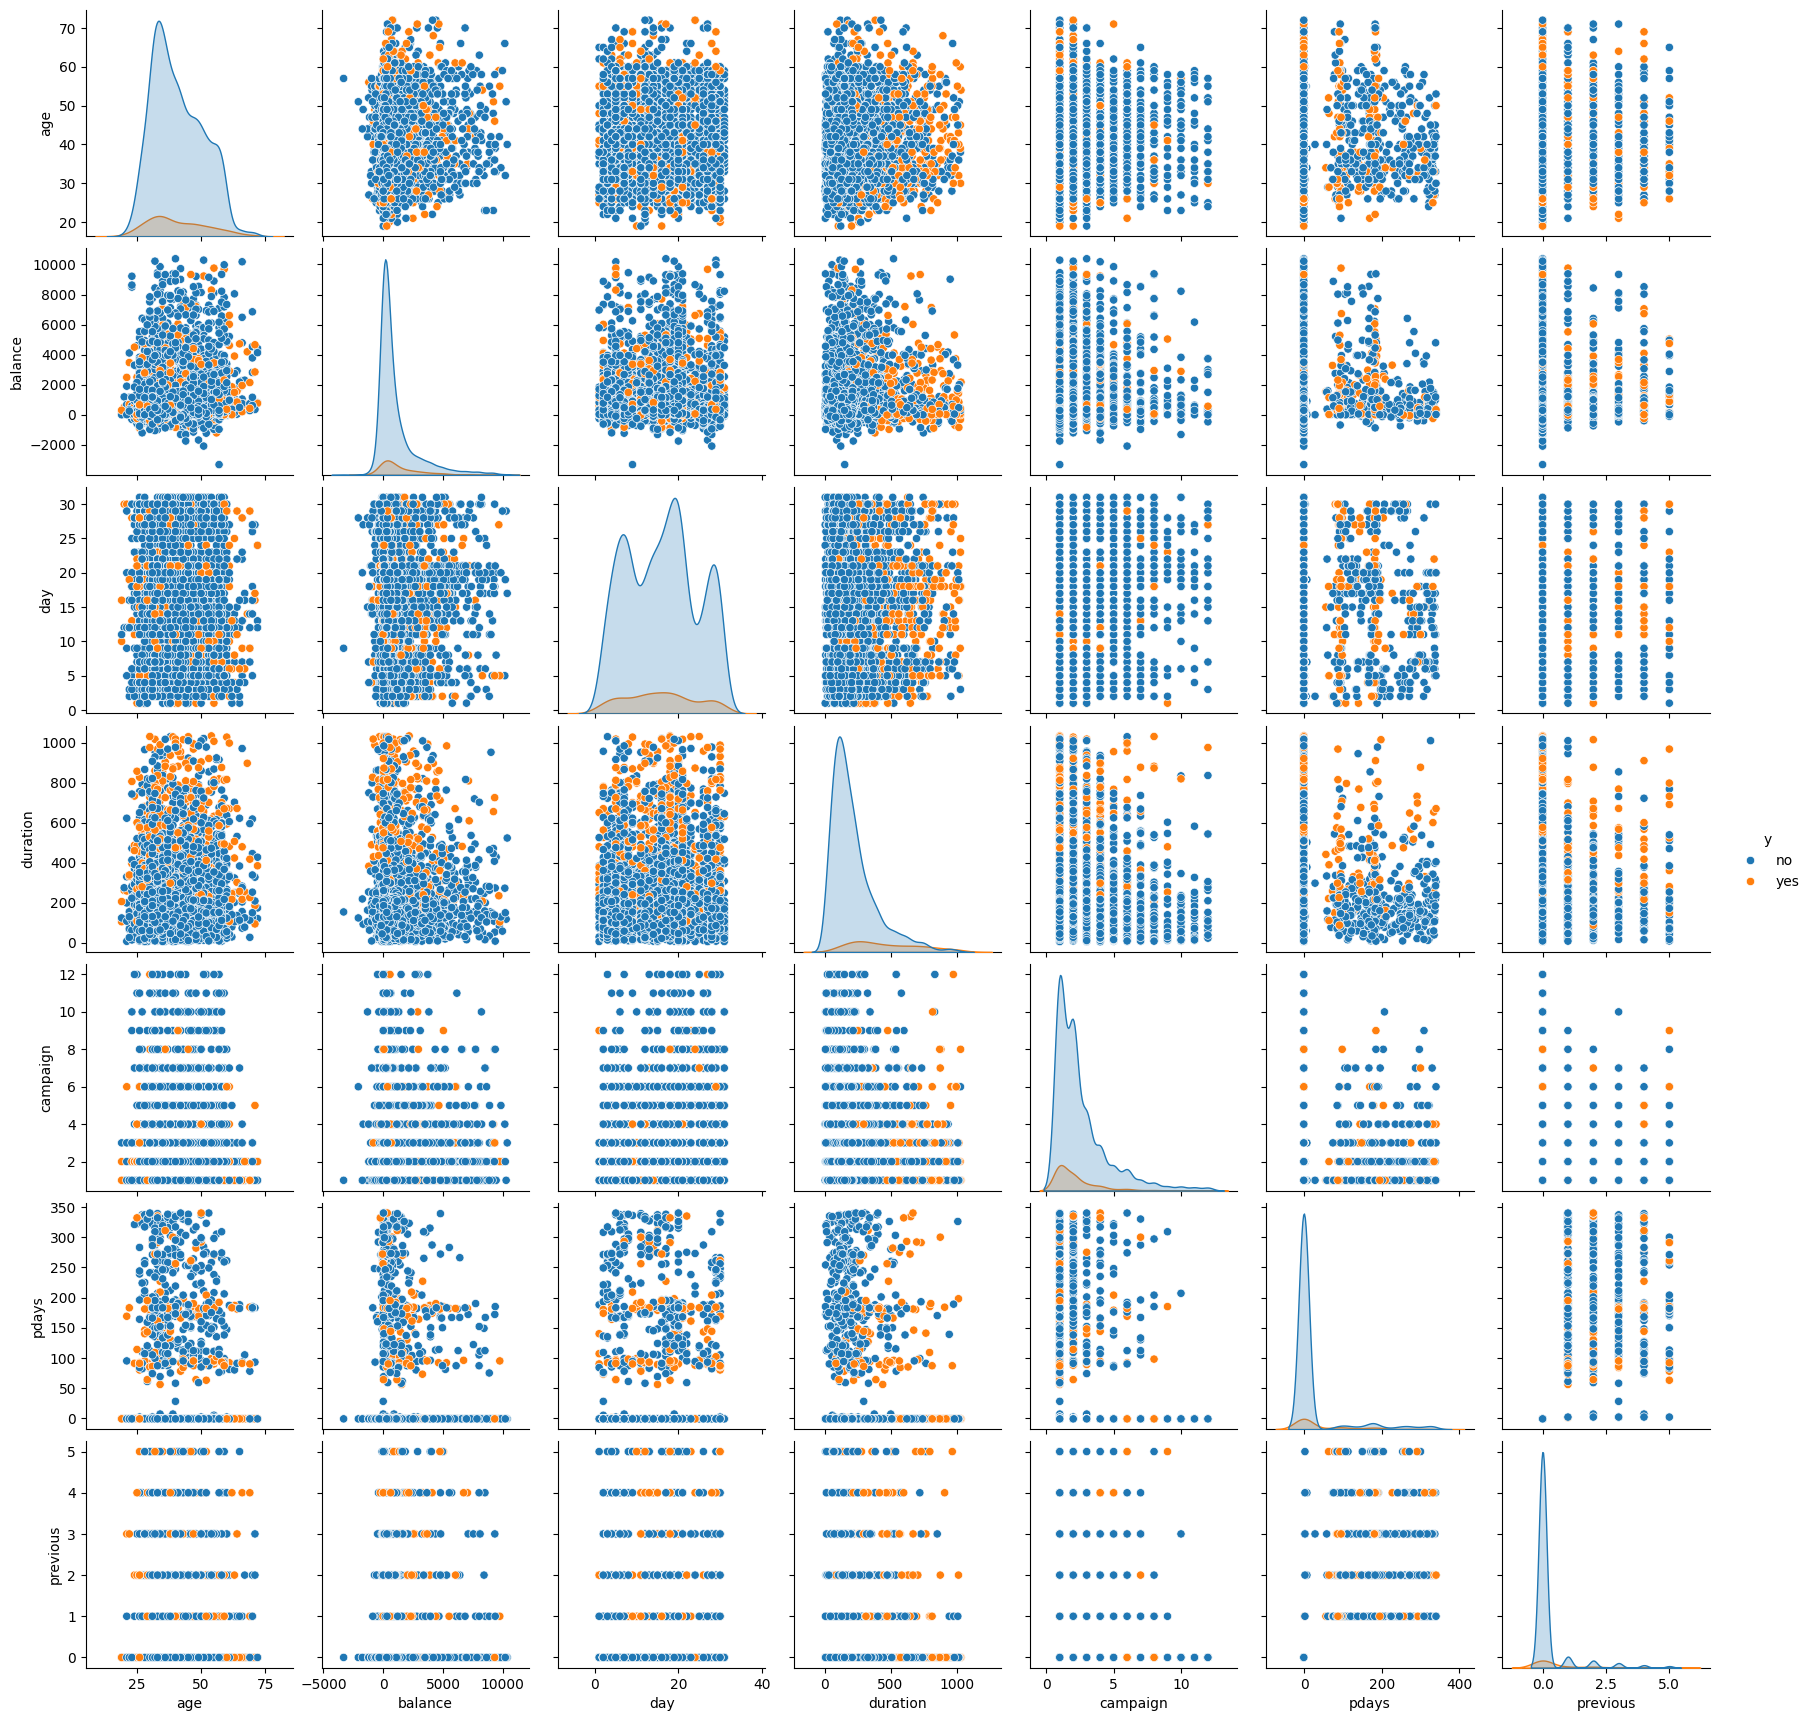

In [88]:
sns.pairplot(data=df,hue='y')

In [89]:
# Correlation matrix for numerical columns
corr_matrix = num_cols.corr()
display(corr_matrix)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.079119,-0.018089,-0.022851,0.031346,-0.008214,0.011355
balance,0.079119,1.000000,0.017920,0.032341,-0.001845,0.016693,0.047709
day,-0.018089,0.017920,1.000000,-0.022922,0.141024,-0.046477,-0.034214
duration,-0.022851,0.032341,-0.022922,1.000000,-0.064775,0.005256,0.018520
campaign,0.031346,-0.001845,0.141024,-0.064775,1.000000,-0.081350,-0.072293
pdays,-0.008214,0.016693,-0.046477,0.005256,-0.081350,1.000000,0.755377
previous,0.011355,0.047709,-0.034214,0.018520,-0.072293,0.755377,1.000000


### 8. Heatmap & Correlation Analysis (10 marks)
- Generate a heatmap to visualize feature correlations.
- Interpret the results to understand feature dependencies.

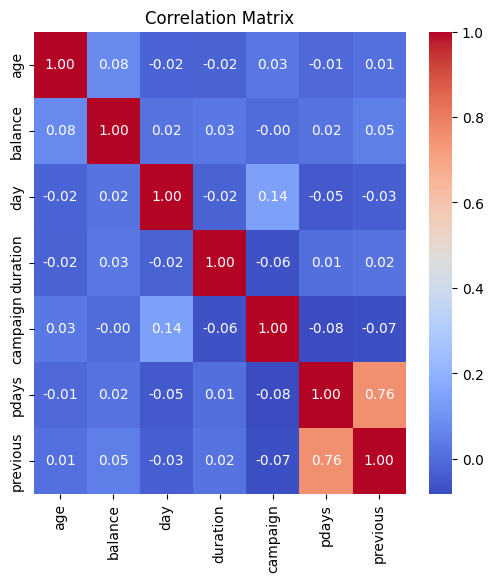

In [90]:
#Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(num_cols.corr(), annot=True,  fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 9. Build Logistic Regression Model (15 marks)
- Split the data into training and testing sets.
- Train a logistic regression model on the training data.
- Display the model coefficients and intercept.

In [91]:
#Transform Categorical data into Numerical
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['poutcome']=le.fit_transform(df['poutcome'])
df['y']=le.fit_transform(df['y'])

In [93]:
#Train the model
X = df.drop(columns=['y'])
y = df['y']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

### 11. Interpretation of Metrics (10 marks)
- Analyze the model's performance based on the evaluation metrics.
- Explain any trade-offs observed in precision and recall.


In [94]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))



 Confusion Matrix:
 [[709  11]
 [ 55  21]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       720
           1       0.66      0.28      0.39        76

    accuracy                           0.92       796
   macro avg       0.79      0.63      0.67       796
weighted avg       0.90      0.92      0.90       796


 Accuracy Score: 0.9170854271356784


### 10. Model Evaluation (10 marks)
- Generate the confusion matrix.
- Compute accuracy, precision, recall, and F1-score.
- Interpret the classification report.


### 12. Final Conclusion (5 marks)
- Summarize the key findings from the analysis.
- Provide suggestions for potential improvements or alternative approaches.

---